<a href="https://colab.research.google.com/github/Ishgar14/Mini-Project/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plot

from skimage.transform import resize
from skimage.io import imread

In [ ]:
goal = []
flatdata = []
SRCDIR = "/content/drive/MyDrive/Smartknower mini project data"
images = []

categories = ['Cats', 'Sharks']

for c in categories:
    target = categories.index(c)
    path = os.path.join(SRCDIR, c)
    print(len(os.listdir(path)))

    for image in os.listdir(path):
        img_matrix = imread(os.path.join(path, image))
        img_resized = resize(img_matrix, (200, 200, 3))
        flatdata.append(img_resized.flatten())
        images.append(img_resized)
        goal.append(target)

flatdata = np.array(flatdata)
goal = np.array(goal)
images = np.array(images)

64
123


In [ ]:
df = pd.DataFrame(flatdata)
df['Goal'] = goal
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,119961,119962,119963,119964,119965,119966,119967,119968,119969,119970,119971,119972,119973,119974,119975,119976,119977,119978,119979,119980,119981,119982,119983,119984,119985,119986,119987,119988,119989,119990,119991,119992,119993,119994,119995,119996,119997,119998,119999,Goal
0,0.031127,0.023284,0.034559,0.031127,0.023284,0.034559,0.031127,0.023284,0.034559,0.031127,0.023284,0.034559,0.031127,0.023284,0.034559,0.031127,0.023284,0.034559,0.031127,0.023284,0.034559,0.023775,0.015931,0.027206,0.023284,0.015441,0.026716,0.024020,0.016176,0.027451,0.027206,0.019363,0.030637,0.027206,0.019363,0.030637,0.029412,0.021569,0.032843,0.031127,...,0.600383,0.534697,0.463863,0.592387,0.526838,0.451455,0.578263,0.512822,0.433900,0.579550,0.520083,0.438174,0.552114,0.494026,0.404075,0.581127,0.523729,0.433058,0.592892,0.545833,0.450245,0.572871,0.525812,0.423851,0.532537,0.488695,0.385126,0.555974,0.516268,0.410631,0.580836,0.541131,0.435493,0.551088,0.514568,0.402558,0.542862,0.464338,0.360049,0
1,0.135080,0.120083,0.115472,0.135585,0.119899,0.108624,0.136933,0.121247,0.109819,0.142892,0.125490,0.112117,0.149510,0.129902,0.114323,0.156618,0.131618,0.110539,0.165441,0.131618,0.105300,0.185064,0.142877,0.118903,0.195113,0.155162,0.119884,0.212944,0.161964,0.126869,0.231618,0.179412,0.141820,0.250245,0.195343,0.152482,0.267616,0.206510,0.165441,0.281204,...,0.630392,0.641667,0.564185,0.617295,0.628569,0.546952,0.594531,0.608333,0.521661,0.574311,0.583287,0.497304,0.560294,0.567892,0.475705,0.519271,0.529856,0.425950,0.470328,0.470573,0.363220,0.436550,0.437944,0.327145,0.420925,0.421630,0.304856,0.378462,0.375031,0.258257,0.327696,0.324265,0.205882,0.308471,0.305040,0.186657,0.271706,0.260233,0.181602,0
2,0.537255,0.521569,0.474510,0.537255,0.521569,0.474510,0.537255,0.521569,0.474510,0.540196,0.524510,0.477451,0.542157,0.526471,0.479412,0.545098,0.529412,0.482353,0.545098,0.529412,0.482353,0.545098,0.529412,0.482353,0.549020,0.533333,0.486275,0.549020,0.533333,0.486275,0.552941,0.537255,0.490196,0.552941,0.537255,0.490196,0.553922,0.538235,0.491176,0.556863,...,0.722196,0.659451,0.557725,0.733490,0.670745,0.570000,0.742078,0.679333,0.584235,0.751490,0.688745,0.595843,0.757137,0.694392,0.604196,0.778078,0.711412,0.632980,0.781020,0.714353,0.635922,0.781020,0.714353,0.631333,0.781020,0.717059,0.628157,0.781020,0.718275,0.623569,0.798196,0.735451,0.637569,0.803843,0.741098,0.642157,0.800902,0.738157,0.636275,0
3,0.352972,0.427482,0.482384,0.355314,0.429824,0.484725,0.364226,0.438736,0.493638,0.371078,0.445588,0.500490,0.379167,0.453676,0.508578,0.384804,0.459314,0.514216,0.393945,0.468455,0.523357,0.399431,0.473941,0.528843,0.408610,0.483119,0.538021,0.416249,0.490759,0.545661,0.423284,0.497794,0.552696,0.424869,0.504412,0.558088,0.427566,0.512615,0.563595,0.431784,...,0.878546,0.855017,0.862860,0.875850,0.852320,0.860164,0.874275,0.850746,0.858589,0.870755,0.847225,0.855069,0.870755,0.847225,0.855069,0.870755,0.847225,0.855069,0.870755,0.847225,0.855069,0.870755,0.847225,0.855069,0.870755,0.847225,0.855069,0.870755,0.847225,0.855069,0.866343,0.842078,0.849676,0.858990,0.823696,0.827618,0.858990,0.823696,0.827618,0
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
...,...,...,

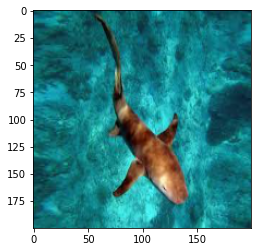

In [ ]:
plot.imshow(images[-1])

In [ ]:
print(len(flatdata))
print(goal)

187
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(
    flatdata, goal, test_size = 0.25, random_state = 0, 
    stratify=goal
    )

print(x_train.shape)
print(x_test.shape)

(140, 120000)
(47, 120000)


In [ ]:
from sklearn.svm import SVC
model = SVC(C=10)
model.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
print(confusion_matrix(y_pred, y_test))
print("Accuray: ",accuracy_score(y_pred, y_test))
print("\t\tClassification Report\n",classification_report(y_pred, y_test))

[[15  2]
 [ 1 29]]
Accuray:  0.9361702127659575
		Classification Report
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.94      0.97      0.95        30

    accuracy                           0.94        47
   macro avg       0.94      0.92      0.93        47
weighted avg       0.94      0.94      0.94        47

